## SYRIA TEL CUSTOMER CHURN PREDICTION PROJECT

Final Project Submission

Students Name: Silvia Gworit

Student pace: Full time Hybrid

Instructor name: Maryann Mwikali


## BUSINESS UNDERSTANDING

## Project Overview

Syria Tel is a telecommunications company that is looking to optimize their resources and improve customer retention. Customer churn is when a customer leaves/discontinues their service with SyriaTel. Due to limited resources, they would like to focus their resources on features that affect customers churn status . This projects main goal is to analyze a telecommunications dataset and develop a predictive model that determines if a customer will churn or not.

## Business Problem

Syria Tel has noticed a number of customers churn from the company. The company looks to improve the customer retention and would like to be able to  determine if a customer is likely to churn from the company or not so as to know where to make improvements and where to allocate their resources effectively.

## Objectives

1. Find the features with the highest correlation to the churn status

2. Build a well performing model that can accurately predict the churn status of a customer

## Proposed Solution

To build a predictive model that will be able to predict given certain features, the customers who are likely to churn and those who are not.
This will help with coming up with strategies to retain the at risk customers and maximize their resources to improve services provided to customers who are less likely to churn.

## DATA UNDERSTANDING
Our data is churn in telecom dataset

Our data has 5 rows × 21 columns

Our data gives information about the customers account and its features

link: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data

## Columns

1.CustomerID: Unique identifier for each customer.

2.AccountLength: The length of time the customer has been with SyriaTel.

3.InternationalPlan: If the customer has an international calling plan or not.

4.VoiceMailPlan: If the customer has a voicemail plan or not.

5.NumberVmailMessages: The number of voicemail messages received by the customer.

6.TotalDayMinutes: Total number of minutes the customer used during the day.

7.TotalEveMinutes: Total number of minutes the customer used during the evening.

8.TotalNightMinutes: Total number of minutes the customer used during the night.

9.TotalIntlMinutes: Total number of international minutes used by the customer.

10.TotalDayCalls: Total number of calls made by the customer during the day.

11.TotalEveCalls: Total number of calls made by the customer during the evening.

12.TotalNightCalls: Total number of calls made by the customer during the night.

13.TotalIntlCalls: Total number of international calls made by the customer.

14.CustomerServiceCalls: Number of customer service calls made by the customer.

15.Churn: Binary indicator of whether the customer churned or not.

## DATA PREPARATION

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [2]:
# loading the datasets
df = pd.read_csv('Churmdata.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df.shape

(3333, 21)

DATA CLEANING

In [6]:
# check for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
#checking for duplicates
df.duplicated().sum()

0

In [8]:
df.drop('phone number', axis = 1, inplace = True)
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

Our data has no duplicates or missing values

EXPLORATORY DATA ANALYSIS

In [9]:
categorical_columns = [ 'international plan', 'voice mail plan','churn']

numerical_columns = ['number vmail messages','total day minutes', 'total day calls', 'total day charge','total eve minutes','total eve calls','total eve charge',
                'total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']

1. Univariate Analysis

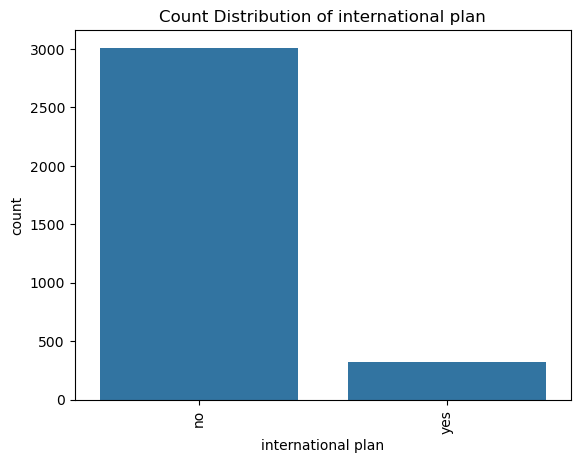

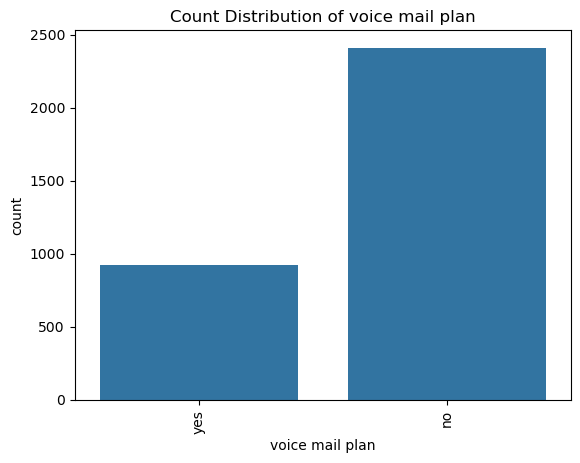

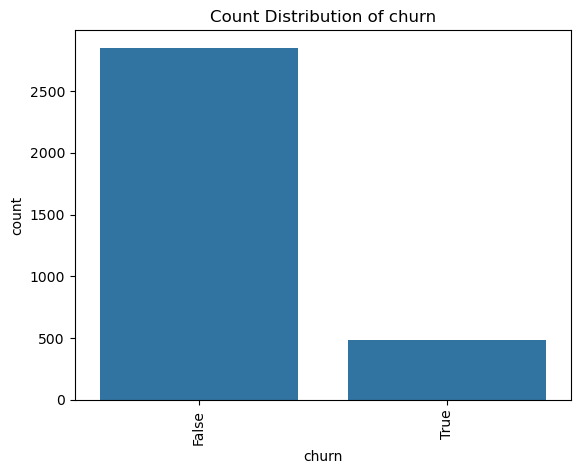

In [10]:
for col in categorical_columns:
    plt.figure()
    
    ax = sns.countplot(data = df, x= col)
    ax.set_title(f'Count Distribution of {col}')
    plt.xticks(rotation= 90)

plt.show()


2. Bivariate Analysis

In [11]:
corr_mat = df[numerical_columns].corr()

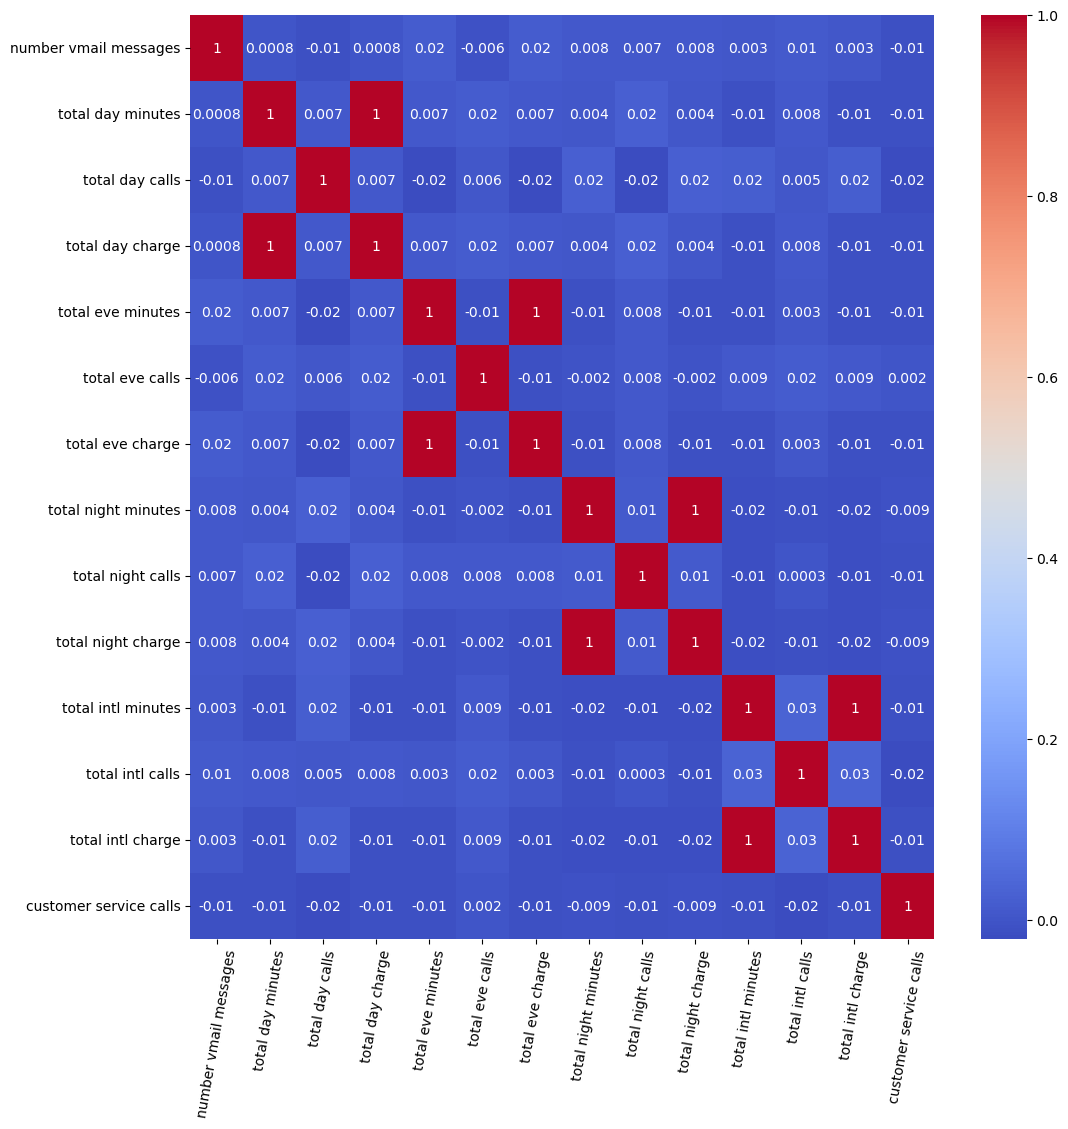

In [12]:
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(12,12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.0g'); 
plt.xticks(rotation=80);
plt.yticks(rotation=0);

Churn Analysis with selected features

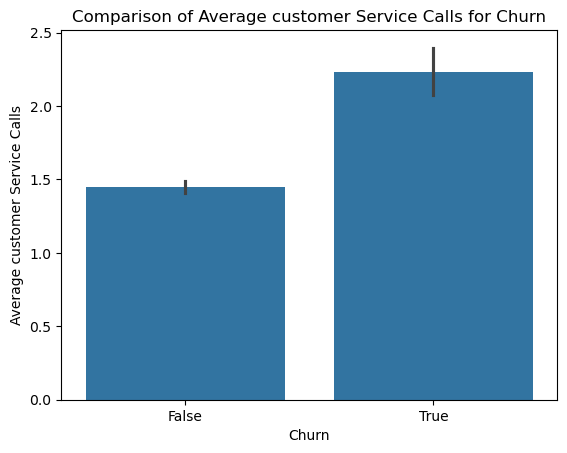

In [13]:
# Plot to see the churn rate and customer service calls
sns.barplot(x='churn', y='customer service calls', data=df)
plt.xlabel('Churn')
plt.ylabel('Average customer Service Calls')
plt.title('Comparison of Average customer Service Calls for Churn')
plt.show()

We are able to see that customers who make more service calls are more likely to churn.

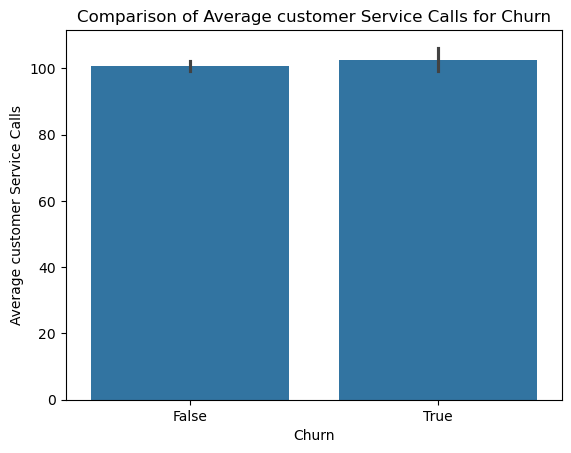

In [14]:
# plot to see churn rate and account length
sns.barplot(x='churn', y='account length', data=df)
plt.xlabel('Churn')
plt.ylabel('Average customer Service Calls')
plt.title('Comparison of Average customer Service Calls for Churn')
plt.show()


From the graph we are not able to tell weather the account length really does determine if the customer is more likely to churn as they are almost evenly distributed

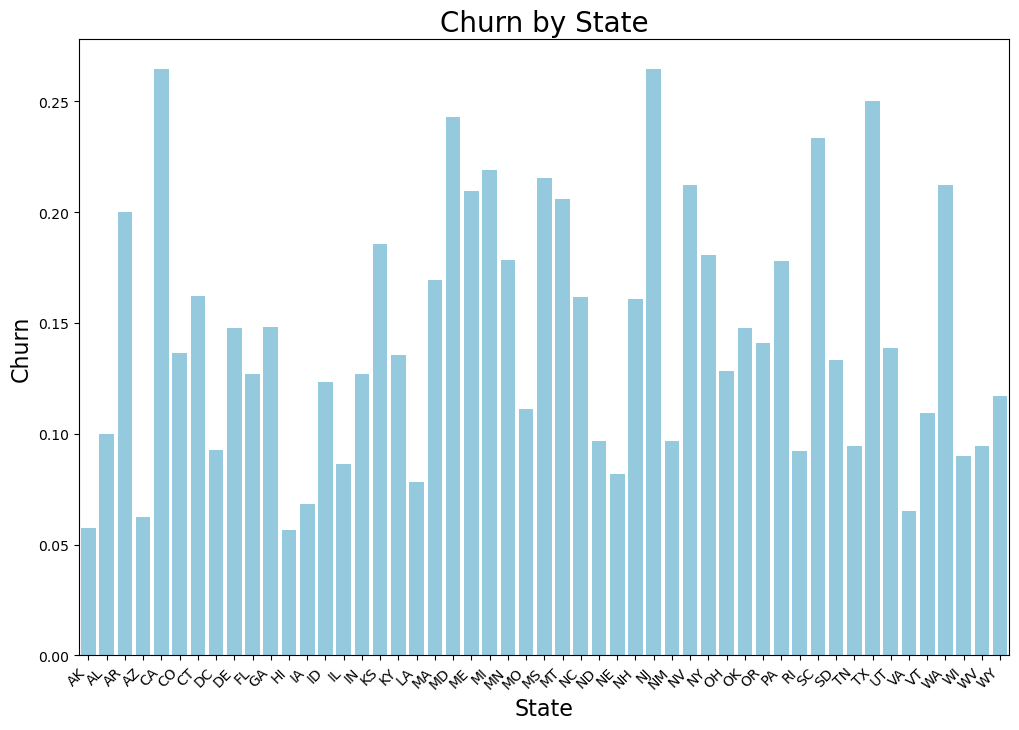

In [15]:
churn_by_state = df.groupby('state')['churn'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=churn_by_state, x='state', y='churn', color='skyblue')
plt.title('Churn by State', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Churn', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
#plt.tight_layout()
plt.show()

From the graph above we can see the states which have the highest churn rates and those with the lowest churn rates.

## MODELLING

MODEL I - LOGISTIC REGRESSION MODEL

In [16]:
# define X and y
y = df['churn']
X = df.drop('churn', axis = 1)

In [17]:
# perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
# One hot encode the categorical columns
X_train_categorical = X_train.select_dtypes(exclude=["int64", "float64"]).copy()
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

ohe.fit(X_train_categorical)
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    # index is important to ensure we can concatenate with other columns
    index=X_train_categorical.index,
    # we are dummying multiple columns at once, so stack the names
    columns=np.hstack(ohe.categories_)
)
X_test_categorical = X_test.select_dtypes(exclude=["int64", "float64"]).copy()
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=np.hstack(ohe.categories_)
)


In [19]:
# scaling our data 
X_train_numeric = X_train[numerical_columns].copy()
X_train_numeric
scaler = StandardScaler()

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_test_numeric = X_test[numerical_columns].copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

In [20]:
# concatenate everything together
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)

In [21]:
X_train.shape, X_test_full.shape, y_train.shape, y_test.shape

((2666, 19), (667, 69), (2666,), (667,))

In [22]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Oversample the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train)

In [23]:
# Fit our model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_resampled, y_train_resampled)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [24]:
# make predictions and evaluate of our model

y_pred = logreg.predict(X_test_full)

def get_evaluation_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(model_name)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)



eval_1 = get_evaluation_metrics(y_test, y_pred, model_log) 
eval_1



LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')
Accuracy: 0.7811094452773614
Precision: 0.3902439024390244
Recall: 0.7920792079207921
F1 Score: 0.5228758169934641


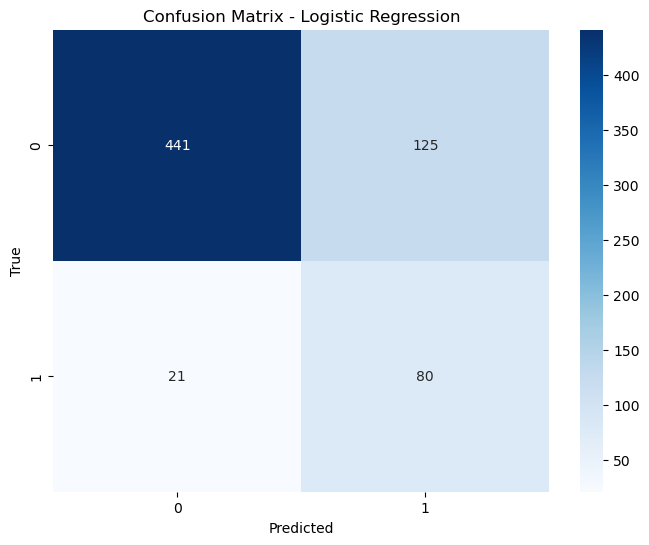

In [25]:
# plottin a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

This model has an accuracy score of 0.781 telling us that the model is able to predict 78% of the test set churn status correctly.

The model also has an F1 score of 0.52. This is not as high as we would like it to be

MODEL II - DECISION TREE

In [26]:
#fit the model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [27]:
# Make predictions for test data and evaluate the model
y_pred = classifier.predict(X_test_full)

eval_2 = get_evaluation_metrics(y_test, y_pred, classifier) 
eval_2

DecisionTreeClassifier(random_state=42)
Accuracy: 0.9025487256371814
Precision: 0.6578947368421053
Recall: 0.7425742574257426
F1 Score: 0.6976744186046512


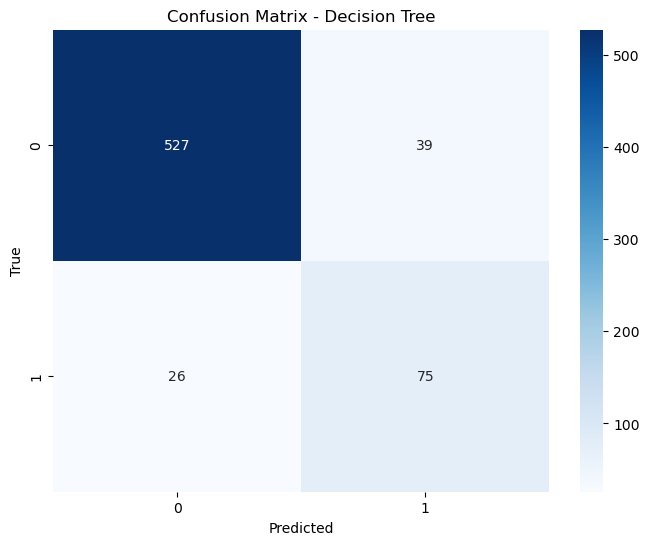

In [28]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

This second model has an accuracy score of 0.902 telling us that the model is able to predict 90.2% of the test set churn rate correctly.

The model also has an F1 score of 0.698. This is am improvement from the previous model

MODEL III - RANDOM FOREST

In [29]:
#Fit the model
forest = RandomForestClassifier()
forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [30]:
# Make predictions and evaluate the model
y_pred = forest.predict(X_test_full)

eval_3 = get_evaluation_metrics(y_test, y_pred, forest) 
eval_3

RandomForestClassifier()
Accuracy: 0.9385307346326837
Precision: 0.8409090909090909
Recall: 0.7326732673267327
F1 Score: 0.783068783068783


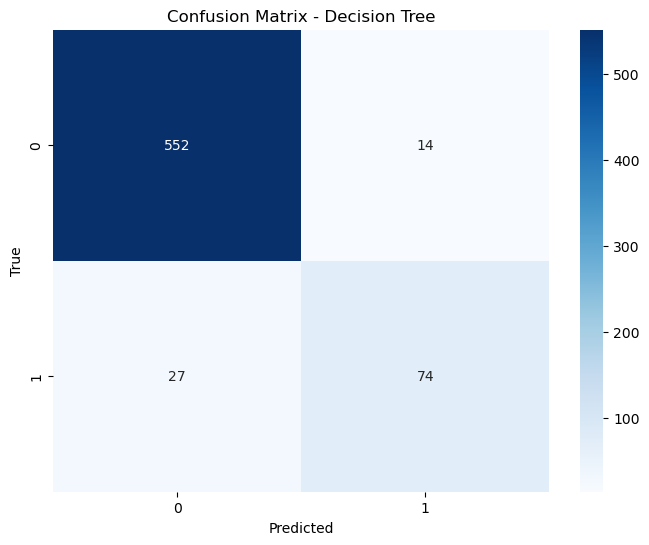

In [31]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

This third model has an accuracy score of 0.94 telling us that the model is able to predict 94% of the test set churn rate correctly.

The model also has an F1 score of 0.79. This is am improvement from the previous models and our best performing model.

## MODELS EVALUATIONS

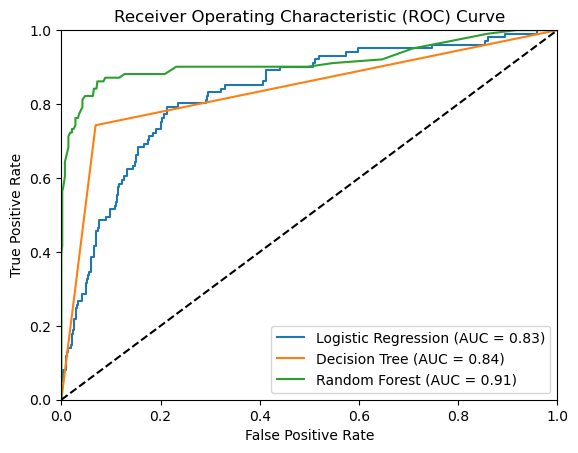

In [32]:
model = {'Logistic Regression': logreg, 'Decision Tree': classifier, 'Random Forest': forest}


for name, model in model.items():
    proba = model.predict_proba(X_test_full)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, auc))

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Based on the graph above we can see that from the AUC, the curve with the highest AUC and is the closest to 1.0 is the best performing model which confirms that the Random Forest is our best model and what we will recommend to be used for future predictions.

## Conclusion


1. From the correlation matrix we can see that the features that have the highest correlation to the churn status are the total day charge, total evening charge, total night charge and total international charge.​

2. From the models we are able to determine that our best performing model was the Random forest with an accuracy level of 94%​

From our project we were able to tell the features that affect the customers churn status. The company could use this to know where to focus their attention as they allocate their resources and determine where improvements should be made.​

We have also been able to develop a model that can accurately predict customers churn status and the company will be able to determine at risk customers and come up with strategies to retain them.